# <center>Capstone Projet<center>

## 1.Introduction 

**Set up a delivery service base for delivering most popular restaurants' food, in Manhattan, New York, USA.**

Since the outbreak of COVID, most people work from home and have more possiblity ordering foods from their favorite restaurants in the neighborhoods.   
There are more and more orders to take, for restaurants, that's a good news.  
But for those who deliver food, their works are getting harder, so they need a place to go back and take a break after the delivery.  
In order to improve the quality of the delivery and to optimize the itinerary, perhaps the delivery service provider wants to know where is the good place to set a base for delivery guys to take a break and also to be close to the popular restaurants in the neighborhoods. 

## 2.Data

Scraping Neighborhoods in New York City Table from Wikipedia and extrat the neighborhoods in Manhattan.  
https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City   

Get Coordinates of neighborhoods from Geopy Client.

Chose the top 5 neighborhoods who have more habitat in those areas.

Use Foursquare Location Data to get the popular spots inforamtion, then cluster to find the good aera to set up a base.

## 3.Methodology 

**Get Data from wiki**  
*-Community Boards*  
*-Neighborhoods*  
*-Area and Population Information*

In [1]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
import requests
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import os

In [2]:
#Get the HTML file from the URL
html = urllib.request.urlopen(
    'https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City').read()

#Read the html file
soup = BeautifulSoup(html)

#Find the table in the HTML file and extract it into a dataframe
table = soup.find('table', attrs = {'class':'wikitable sortable'})
table_rows = table.find_all('tr')
res = []

for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.replace("\n", "") for tr in td]
    if row:
        res.append(row)
        
df = pd.DataFrame(res, columns = [
    "Community_Boards_CB", "Area_km^2", 
    "Pop_Census_2010", 
    "Pop_per_km^2", 
    "Neighborhoods"])
df

,Community_Boards_CB,Area_km^2,Pop_Census_2010,Pop_per_km^2,Neighborhoods
0,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris"
1,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood"
2,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo..."
3,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge"
4,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit..."
5,Bronx CB 6,4.01,"83,268","20,765","Bathgate, Belmont, East Tremont, West Farms"
6,Bronx CB 7,4.84,"139,286","28,778","Bedford Park, Norwood, University Heights"
7,Bronx CB 8,8.83,"101,731","11,521","Fieldston, Kingsbridge, Kingsbridge Heights, M..."
8,Bronx CB 9,12.41,"172,298","13,884","Bronx River, Bruckner, Castle Hill, Clason Poi..."
9,Bronx CB 10,16.76,"120,392","7,183","City Island, Co-op City, Locust Point, Pelham ..."


In [3]:
#Get the type of each columns in the dataframe
df.dtypes

Community_Boards_CB    object
Area_km^2              object
Pop_Census_2010        object
Pop_per_km^2           object
Neighborhoods          object
dtype: object

In [4]:
#Area_km^2, Pop_Census_2010 and Pop_per_km^2 columns are object type, need to be convert to float type
df['Area_km^2'] = df['Area_km^2'].astype(float)
df['Pop_Census_2010'] = df['Pop_Census_2010'].str.replace(',', '').astype(float)
df['Pop_per_km^2'] = df['Pop_per_km^2'].str.replace(',', '').astype(float)

In [5]:
#Verify columns' types
df.dtypes

Community_Boards_CB     object
Area_km^2              float64
Pop_Census_2010        float64
Pop_per_km^2           float64
Neighborhoods           object
dtype: object

In [6]:
#Extract those Community of Manhattan
Manh = df[df["Community_Boards_CB"].str.contains('Manhattan')]

#Get the top 5 habitat Community of Manhattan
Manh_top5 = Manh.sort_values("Pop_per_km^2", axis=0, ascending=False).head(5)
Manh_top5

,Community_Boards_CB,Area_km^2,Pop_Census_2010,Pop_per_km^2,Neighborhoods
37,Manhattan CB 8,5.13,217063.0,42312.0,"Lenox Hill, Roosevelt Island, Upper East Side,..."
35,Manhattan CB 6,3.55,136152.0,38353.0,"Gramercy Park, Kips Bay, Rose Hill, Murray Hil..."
36,Manhattan CB 7,5.46,207699.0,38040.0,"Lincoln Square, Manhattan Valley, Upper West Side"
32,Manhattan CB 3,4.56,164407.0,36054.0,"Alphabet City, Chinatown, East Village, Lower ..."
39,Manhattan CB 10,3.63,107109.0,29507.0,"Harlem, Polo Grounds"


In [7]:
#We keep only the CB number and simplfy the name of Community_Boards_CB as CB
Manh_top5["Community_Boards_CB"] = Manh_top5["Community_Boards_CB"].str.slice(10, 15)
Manh_top5.rename(columns={"Community_Boards_CB":"CB"}, inplace=True)

In [8]:
#Reset the index and print the dataframe
Manh_top5.reset_index(drop=True)

,CB,Area_km^2,Pop_Census_2010,Pop_per_km^2,Neighborhoods
0,CB 8,5.13,217063.0,42312.0,"Lenox Hill, Roosevelt Island, Upper East Side,..."
1,CB 6,3.55,136152.0,38353.0,"Gramercy Park, Kips Bay, Rose Hill, Murray Hil..."
2,CB 7,5.46,207699.0,38040.0,"Lincoln Square, Manhattan Valley, Upper West Side"
3,CB 3,4.56,164407.0,36054.0,"Alphabet City, Chinatown, East Village, Lower ..."
4,CB 10,3.63,107109.0,29507.0,"Harlem, Polo Grounds"


In [9]:
#Simplify the top 5 dataframe, keep only the CB and the Neighborhoods columns
Manh_top5 = Manh_top5[["CB","Neighborhoods"]]
Manh_top5

,CB,Neighborhoods
37,CB 8,"Lenox Hill, Roosevelt Island, Upper East Side,..."
35,CB 6,"Gramercy Park, Kips Bay, Rose Hill, Murray Hil..."
36,CB 7,"Lincoln Square, Manhattan Valley, Upper West Side"
32,CB 3,"Alphabet City, Chinatown, East Village, Lower ..."
39,CB 10,"Harlem, Polo Grounds"


**We can see in the dataframe of Manh_top5, in the columns of Neighborhoods, there are more than one Neighborhood.  
So we want to seperate them into different rows.**

In [10]:
#Start with creating a new dataframe from the series with CB as the index
df_Neighborhoods = pd.DataFrame(Manh_top5["Neighborhoods"]
                                .str.split(',').tolist(), index=Manh_top5.CB).stack()

#Now get rid of the secondary index
#Make CB as a column (it can't be an index since the values will be duplicate)
df_Neighborhoods = df_Neighborhoods.reset_index([0, 'CB'])

#Set the column names
df_Neighborhoods.columns = ['CB', 'Neighborhood']
df_Neighborhoods

,CB,Neighborhood
0,CB 8,Lenox Hill
1,CB 8,Roosevelt Island
2,CB 8,Upper East Side
3,CB 8,Yorkville
4,CB 6,Gramercy Park
5,CB 6,Kips Bay
6,CB 6,Rose Hill
7,CB 6,Murray Hill
8,CB 6,Peter Cooper Village
9,CB 6,Stuyvesant Town


In [11]:
#Let's add the geo information to our dataframe by using Nominatim
geolocator = Nominatim(user_agent = "Manhattan_explorer")

df_Neighborhoods['Location'] = df_Neighborhoods['Neighborhood'].apply(
    geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

df_Neighborhoods[['Latitude', 'Longitude']] = df_Neighborhoods['Location'].apply(pd.Series)

df_Neighborhoods.drop(['Location'], axis=1, inplace=True)
df_Neighborhoods

,CB,Neighborhood,Latitude,Longitude
0,CB 8,Lenox Hill,40.766437,-73.959017
1,CB 8,Roosevelt Island,40.761418,-73.950228
2,CB 8,Upper East Side,40.773702,-73.964120
3,CB 8,Yorkville,40.778007,-73.948202
4,CB 6,Gramercy Park,40.737925,-73.985932
5,CB 6,Kips Bay,40.739546,-73.977083
6,CB 6,Rose Hill,41.321953,-92.462132
7,CB 6,Murray Hill,38.290348,-85.588294
8,CB 6,Peter Cooper Village,40.733918,-73.976030
9,CB 6,Stuyvesant Town,40.731971,-73.978093


**As you can see 4 coordinates are completely wrong (Rose Hil, Murray Hill, Sutton Place, Polo Grounds), which is due to the names of the neighborhood represent multiple area in this data-frame. In this way, the return value could be inappropriate.**  

**So I replace these coordinates with values acquired from:**  
https://latitude.to/articles-by-country/us/united-states  
https://www.mapcoordinates.net  
__________
* <Index 6> Rose Hill	: 40.743338, -73.984159
* <Index 7> Murray Hill : 40.742330, -73.973662
* <Index 10> Sutton Place : 40.758037, -73.960182  
* <Index 23> Polo Grounds : 40.825163, -73.935829

In [12]:
#Let's correct these coordinates
df_Neighborhoods.loc[6, 'Latitude'] = 40.743338
df_Neighborhoods.loc[6, 'Longitude'] = -73.984159
df_Neighborhoods.loc[7, 'Latitude'] = 40.742330
df_Neighborhoods.loc[7, 'Longitude'] = -73.973662
df_Neighborhoods.loc[10, 'Latitude'] = 40.758037
df_Neighborhoods.loc[10, 'Longitude'] = -73.960182
df_Neighborhoods.loc[23, 'Latitude'] = 40.825163
df_Neighborhoods.loc[23, 'Longitude'] = -73.935829

In [13]:
#Coordinates corrected
df_Neighborhoods

,CB,Neighborhood,Latitude,Longitude
0,CB 8,Lenox Hill,40.766437,-73.959017
1,CB 8,Roosevelt Island,40.761418,-73.950228
2,CB 8,Upper East Side,40.773702,-73.964120
3,CB 8,Yorkville,40.778007,-73.948202
4,CB 6,Gramercy Park,40.737925,-73.985932
5,CB 6,Kips Bay,40.739546,-73.977083
6,CB 6,Rose Hill,40.743338,-73.984159
7,CB 6,Murray Hill,40.742330,-73.973662
8,CB 6,Peter Cooper Village,40.733918,-73.976030
9,CB 6,Stuyvesant Town,40.731971,-73.978093


In [14]:
#Get the latitude and the longitude of Manhattan
address = 'Manhattan , NY'
geolocator = Nominatim(user_agent = "Manhattan_explorer")
location = geolocator.geocode(address)
latitude = location.latitude-0.025 # For better displaly
longitude = location.longitude

print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.764623900000004, -73.9598939.


In [15]:
#Create map of Top 5 Habitat Community of Manhattan using latitude and longitude values
Manhattan_habitat = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_Neighborhoods['Latitude'], df_Neighborhoods['Longitude'], 
                           df_Neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='lightblue',
        fill_opacity=0.8).add_to(Manhattan_habitat) 

Manhattan_habitat

**Let's use the Foursquare API to explore the neighborhoods and segment them**

In [16]:
#Foursquare API credentials
CLIENT_ID = os.environ.get('Foursquare_ID')
CLIENT_SECRET = os.environ.get('Foursquare_SECRET')
VERSION = '20200605' 

#We set the parameter of searching venues
LIMIT = 100
radius = 1000

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        #Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        #Make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        #Return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

**Use the Function Above to Create the Dataframe of Venues Around Those neighborhoods in top 5 habitat comunity in Manhattan**

In [18]:
df_Neighborhoods_Venues = getNearbyVenues(names=df_Neighborhoods['Neighborhood'],
                                   latitudes=df_Neighborhoods['Latitude'],
                                   longitudes=df_Neighborhoods['Longitude'],
                                          radius=radius
                                  )

Lenox Hill
 Roosevelt Island
 Upper East Side
 Yorkville
Gramercy Park
 Kips Bay
 Rose Hill
 Murray Hill
 Peter Cooper Village
 Stuyvesant Town
 Sutton Place
 Tudor City
 Turtle Bay
 Waterside Plaza
Lincoln Square
 Manhattan Valley
 Upper West Side
Alphabet City
 Chinatown
 East Village
 Lower East Side
 Two Bridges
Harlem
 Polo Grounds


In [19]:
#Let's see how many venues we got
print ("Shape of the Venues Dataframe: ", df_Neighborhoods_Venues.shape)
df_Neighborhoods_Venues.head()

Shape of the Venues Dataframe:  (2400, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Lenox Hill,40.766437,-73.959017,Whiskey & Wine Off 69,40.767272,-73.959544,Liquor Store
1,Lenox Hill,40.766437,-73.959017,Bagelworks,40.764294,-73.958518,Bagel Shop
2,Lenox Hill,40.766437,-73.959017,sweetgreen,40.767128,-73.956846,Salad Place
3,Lenox Hill,40.766437,-73.959017,Kome Waza UES,40.765602,-73.957403,Japanese Restaurant
4,Lenox Hill,40.766437,-73.959017,Zawa,40.763977,-73.959188,Sushi Restaurant


In [20]:
#Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(df_Neighborhoods_Venues['Venue_Category'].unique())))

#We can check some of the categories 
print (df_Neighborhoods_Venues[['Venue_Category']][0:15])

There are 279 unique categories.
          Venue_Category
0           Liquor Store
1             Bagel Shop
2            Salad Place
3    Japanese Restaurant
4       Sushi Restaurant
5                    Gym
6           Cycle Studio
7       Cuban Restaurant
8   Gym / Fitness Center
9       Greek Restaurant
10            Smoke Shop
11     Health Food Store
12           Pizza Place
13       Thai Restaurant
14  Gym / Fitness Center


**Create a Data-frame with the 15 Most Frequently Occuring Venue_Category**

In [21]:
#Create a dataframe of top 15 categories
df_Neighborhoods_Venues_Top15 = df_Neighborhoods_Venues['Venue_Category'].value_counts()[0:15].to_frame(name='frequency')
df_Neighborhoods_Venues_Top15 =df_Neighborhoods_Venues_Top15.reset_index()
df_Neighborhoods_Venues_Top15.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)

df_Neighborhoods_Venues_Top15

,Venue_Category,Frequency
0,Coffee Shop,106
1,Pizza Place,71
2,Park,69
3,Bar,64
4,Italian Restaurant,58
5,American Restaurant,58
6,Gym / Fitness Center,54
7,Ice Cream Shop,53
8,Bakery,51
9,Mexican Restaurant,50


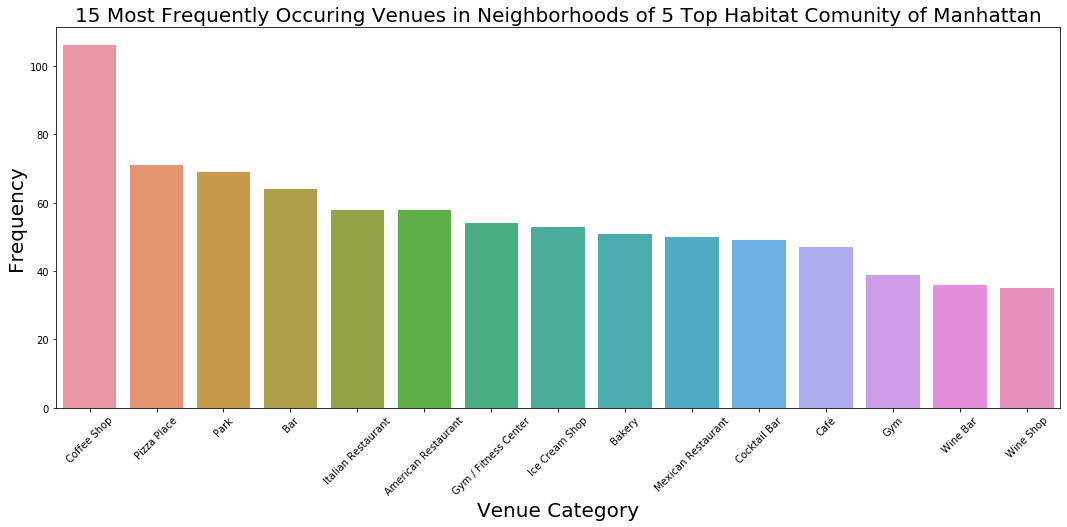

In [22]:
#Creat a bar plot to show the 15 top venues' type in the neighborhoods of the 5 top habitat comunity of Manhattan
import seaborn as sns

fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=df_Neighborhoods_Venues_Top15)
s.set_xticklabels(s.get_xticklabels(), rotation=45)
plt.title('15 Most Frequently Occuring Venues in Neighborhoods of 5 Top Habitat Comunity of Manhattan', fontsize=20)
plt.xlabel("Venue Category", fontsize=20)
plt.ylabel ("Frequency", fontsize=20)
plt.savefig("Most_Freq_Venues.png", dpi=300)

plt.show()

**In the df_Neighborhoods_Venues dataframe, there are lots of types of venues, we want to focus on the restaurant part, so let's do it.**  
*Don't forget the Pizza Place also account.*

In [23]:
#Create a Data-Frame out of it to Concentrate Only on Restaurants 
df_Neighborhoods_Venues_only_restaurant = df_Neighborhoods_Venues[df_Neighborhoods_Venues['Venue_Category']\
                                                          .str.contains('Restaurant|Pizza')]
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", df_Neighborhoods_Venues_only_restaurant.shape)
df_Neighborhoods_Venues_only_restaurant.head()

Shape of the Data-Frame with Venue Category only Restaurant:  (742, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
3,Lenox Hill,40.766437,-73.959017,Kome Waza UES,40.765602,-73.957403,Japanese Restaurant
4,Lenox Hill,40.766437,-73.959017,Zawa,40.763977,-73.959188,Sushi Restaurant
7,Lenox Hill,40.766437,-73.959017,Sophie's Cuban Cuisine,40.765088,-73.957548,Cuban Restaurant
9,Lenox Hill,40.766437,-73.959017,Greek Eats,40.764218,-73.958612,Greek Restaurant
12,Lenox Hill,40.766437,-73.959017,Pizza Park,40.764305,-73.958503,Pizza Place


In [24]:
#Show in Map the Top Rated Restaruants in the these Neighborhood
map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='cartodbpositron')

#Give the neighborhoods' name in a list
Neighborh = ['Lenox Hill', ' Roosevelt Island', ' Upper East Side',
       ' Yorkville', 'Gramercy Park', ' Kips Bay', ' Rose Hill',
       ' Murray Hill', ' Peter Cooper Village', ' Stuyvesant Town',
       ' Sutton Place', ' Tudor City', ' Turtle Bay', ' Waterside Plaza',
       'Lincoln Square', ' Manhattan Valley', ' Upper West Side',
       'Alphabet City', ' Chinatown', ' East Village', ' Lower East Side',
       ' Two Bridges', 'Harlem', ' Polo Grounds']

x = np.arange(len(Neighborh))

#Set colors for the Venues based on the neighborhood
rainbow = ['#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#556B2F',
           '#6B8E23', '#9ACD32', '#32CD32' ,'#00FF00' ,'#7CFC00',
           '#ADFF2F', '#00FF7F', '#90EE90', '#98FB98', '#483D8B',
           '#6A5ACD', '#7B68EE', '#D2691E', '#8B4513', '#A0522D', '#A52A2A', '#CD853F', '#48D1CC', '#00FFFF']

#Add markers to the map
for lat, lon, poi, distr in zip(df_Neighborhoods_Venues_only_restaurant['Venue_Lat'], 
                                  df_Neighborhoods_Venues_only_restaurant['Venue_Long'], 
                                  df_Neighborhoods_Venues_only_restaurant['Venue_Category'], 
                                  df_Neighborhoods_Venues_only_restaurant['Neighborhood']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[Neighborh.index(distr)-1],
        fill=True,
        fill_color=rainbow[Neighborh.index(distr)-1],
        fill_opacity=0.5).add_to(map_restaurants)
       
map_restaurants

**Let's go more deeper in the venue dataframe**

In [25]:
#Use One Hot Encoding to Get More Information about the Venue Categories 
df_Neighborhoods_Venues_onehot  = pd.get_dummies(df_Neighborhoods_Venues[['Venue_Category']], prefix="", prefix_sep="")

#Add district column back to dataframe
df_Neighborhoods_Venues_onehot['Neighborhood'] = df_Neighborhoods_Venues['Neighborhood'] 

#Move district column to the first column
fixed_columns = [df_Neighborhoods_Venues_onehot.columns[-1]] + list(df_Neighborhoods_Venues_onehot.columns[:-1])
df_Neighborhoods_Venues_onehot = df_Neighborhoods_Venues_onehot[fixed_columns]

df_Neighborhoods_Venues_onehot.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Lenox Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lenox Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lenox Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lenox Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lenox Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Group the rows by neighborhood 
df_Neighborhoods_Venues_Grouped = df_Neighborhoods_Venues_onehot.groupby('Neighborhood').mean().reset_index()

df_Neighborhoods_Venues_Grouped

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Chinatown,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.03,0.01,0.00,0.01,0.01
1,East Village,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,...,0.00,0.01,0.02,0.00,0.00,0.03,0.03,0.00,0.00,0.00
2,Kips Bay,0.00,0.00,0.00,0.05,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.01,0.00,0.01
3,Lower East Side,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.01,0.03,...,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00
4,Manhattan Valley,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.01,0.00,0.02
5,Murray Hill,0.00,0.00,0.00,0.04,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.01
6,Peter Cooper Village,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.01
7,Polo Grounds,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Roosevelt Island,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.01
9,Rose Hill,0.00,0.00,0.00,0.05,0.00,0.01,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.01


In [27]:
#Top 5 popular venues frequent in each neighborhood
num_top_venues = 5

for places in df_Neighborhoods_Venues_Grouped['Neighborhood']:
    print("########"+places+"########")
    temp = df_Neighborhoods_Venues_Grouped[df_Neighborhoods_Venues_Grouped['Neighborhood'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

######## Chinatown########
                Venue  Freq
0      Sandwich Place  0.05
1        Cocktail Bar  0.05
2              Bakery  0.04
3         Coffee Shop  0.04
4  Mexican Restaurant  0.04


######## East Village########
            Venue  Freq
0  Ice Cream Shop  0.05
1     Pizza Place  0.04
2     Coffee Shop  0.04
3       Juice Bar  0.03
4    Dessert Shop  0.03


######## Kips Bay########
                 Venue  Freq
0          Pizza Place  0.05
1                  Bar  0.05
2  American Restaurant  0.05
3          Coffee Shop  0.04
4    Indian Restaurant  0.04


######## Lower East Side########
                Venue  Freq
0  Mexican Restaurant  0.04
1                Café  0.04
2      Sandwich Place  0.04
3         Pizza Place  0.04
4                 Bar  0.03


######## Manhattan Valley########
                Venue  Freq
0         Coffee Shop  0.07
1  Chinese Restaurant  0.04
2   Indian Restaurant  0.04
3         Pizza Place  0.04
4                Park  0.04


######## Murray Hi

In [28]:
#Define a Function to select the top 10 rows (According to the Values) 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

#Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

#Create a new dataframe
Neighborhood_top10_venues_sorted = pd.DataFrame(columns=columns)
Neighborhood_top10_venues_sorted['Neighborhood'] = df_Neighborhoods_Venues_Grouped['Neighborhood']

for ind in np.arange(df_Neighborhoods_Venues_Grouped.shape[0]):
    Neighborhood_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_Neighborhoods_Venues_Grouped.iloc[ind, :], num_top_venues)

Neighborhood_top10_venues_sorted.index = np.arange(1, len(Neighborhood_top10_venues_sorted)+1)
Neighborhood_top10_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Cocktail Bar,Sandwich Place,Bakery,Coffee Shop,Mexican Restaurant,Chinese Restaurant,Wine Bar,Ice Cream Shop,Cosmetics Shop,Salon / Barbershop
2,East Village,Ice Cream Shop,Pizza Place,Coffee Shop,Mediterranean Restaurant,Wine Shop,Wine Bar,Dessert Shop,Italian Restaurant,Japanese Restaurant,Juice Bar
3,Kips Bay,Bar,American Restaurant,Pizza Place,Cocktail Bar,Indian Restaurant,Ice Cream Shop,Coffee Shop,Grocery Store,Mexican Restaurant,Spa
4,Lower East Side,Mexican Restaurant,Sandwich Place,Café,Pizza Place,Coffee Shop,Ice Cream Shop,Bar,Cocktail Bar,Art Gallery,Chinese Restaurant
5,Manhattan Valley,Coffee Shop,Chinese Restaurant,Indian Restaurant,Pizza Place,Park,Bar,Bookstore,Ice Cream Shop,American Restaurant,Grocery Store


shape of the dataframe:  (24, 2)
        Neighborhood  Number of Restaurant
1          Chinatown                    32
2       East Village                    37
3           Kips Bay                    31
4    Lower East Side                    42
5   Manhattan Valley                    33
[32, 37, 31, 42, 33, 30, 31, 18, 28, 37, 35, 32, 30, 30, 33, 17, 35, 28, 30, 39, 30, 35, 31, 18]


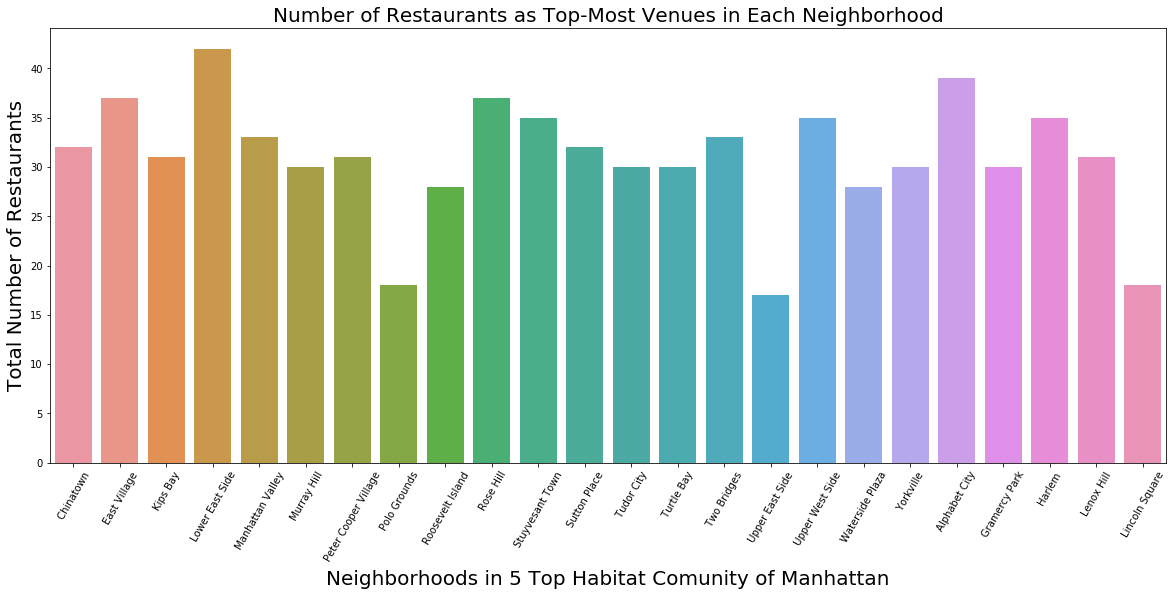

In [29]:
#Try groupby to play with restaurant 
Neighborhoods_Venues_restaurant = df_Neighborhoods_Venues.groupby(['Neighborhood'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant|Pizza')].count())
Neighborhoods_Venues_restaurant_df = Neighborhoods_Venues_restaurant.to_frame().reset_index()
Neighborhoods_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']


Neighborhoods_Venues_restaurant_df.index = np.arange(1, len(Neighborhoods_Venues_restaurant_df)+1)

print ("shape of the dataframe: ", Neighborhoods_Venues_restaurant_df.shape)
print (Neighborhoods_Venues_restaurant_df.head())

list_rest_no = Neighborhoods_Venues_restaurant_df['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(20,8))
bar = sns.barplot(x='Neighborhood', y='Number of Restaurant', data=Neighborhoods_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=20)
bar.set_xlabel("Neighborhoods in 5 Top Habitat Comunity of Manhattan", fontsize=20)
bar.set_xticklabels(bar.get_xticklabels(),rotation=60)
bar.set_title("Number of Restaurants as Top-Most Venues in Each Neighborhood", fontsize=20)
plt.savefig("Top_Venues_Restaurants.png", dpi=300)
plt.show()

**We'd like to know the number of restaurant as top-most venues in the comunity of Manhattan**

In [30]:
#Get the name of neighborhood and the community board's number
Neighborhoods_Venues_restaurant_df.set_index("Neighborhood", inplace=True)
df_Neighborhoods_CB = df_Neighborhoods.set_index("Neighborhood")
df_Neighborhoods_CB = pd.DataFrame(df_Neighborhoods_CB["CB"])

In [31]:
#Create a NaN column in the dataframe
Neighborhoods_Venues_restaurant_df["CB"] = np.nan

#Get the community board's number of each neighborhood
for N in Neighborhoods_Venues_restaurant_df.index.values:
    Neighborhoods_Venues_restaurant_df.loc[N, "CB"] = df_Neighborhoods_CB.loc[N, "CB"]

Neighborhoods_Venues_restaurant_df = Neighborhoods_Venues_restaurant_df.reset_index()
Neighborhoods_Venues_restaurant_df

,Neighborhood,Number of Restaurant,CB
0,Chinatown,32,CB 3
1,East Village,37,CB 3
2,Kips Bay,31,CB 6
3,Lower East Side,42,CB 3
4,Manhattan Valley,33,CB 7
5,Murray Hill,30,CB 6
6,Peter Cooper Village,31,CB 6
7,Polo Grounds,18,CB 10
8,Roosevelt Island,28,CB 8
9,Rose Hill,37,CB 6


In [32]:
#Sum the number of restaurant and count the number of neighborhood in the comunity
CB_Venues_restaurant_df = Neighborhoods_Venues_restaurant_df.groupby("CB")[
    "Number of Restaurant"].agg(['sum','count'])
CB_Venues_restaurant_df.reset_index(inplace=True)
CB_Venues_restaurant_df

,CB,sum,count
0,CB 10,53,2
1,CB 3,183,5
2,CB 6,314,10
3,CB 7,86,3
4,CB 8,106,4


In [33]:
#Calculate the intensity of restaurant per neighborhood in each comunity
CB_Venues_restaurant_df["intensity"] = np.nan

for index in range(0,5):
    CB_Venues_restaurant_df.loc[index, "intensity"] = CB_Venues_restaurant_df.loc[
        index, "sum"]/CB_Venues_restaurant_df.loc[index, "count"]

CB_Venues_restaurant_df.sort_values("intensity",ascending=False, inplace=True)

CB_Venues_restaurant_df.rename(columns={"sum":"Number of Restaurants", 
                                        "count":"Neighborhoods take account in the Comunity", 
                                        "intensity":"Intensity"}, 
                               inplace=True)

CB_Venues_restaurant_df

,CB,Number of Restaurants,Neighborhoods take account in the Comunity,Intensity
1,CB 3,183,5,36.600000
2,CB 6,314,10,31.400000
3,CB 7,86,3,28.666667
0,CB 10,53,2,26.500000
4,CB 8,106,4,26.500000


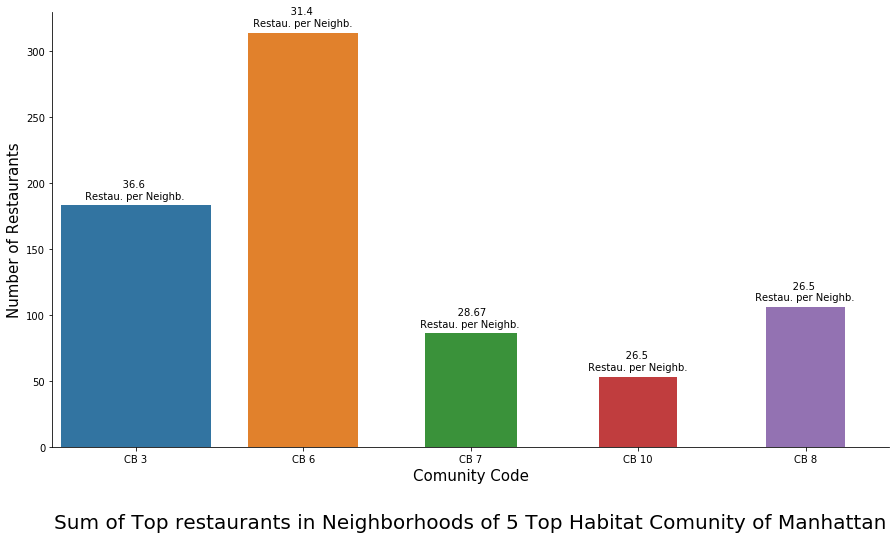

In [34]:
#Print a bar plot
fig = plt.figure(figsize=(15,8))
c=sns.barplot(x="CB", y="Number of Restaurants", data=CB_Venues_restaurant_df)
s.set_xticklabels(s.get_xticklabels(), rotation=0)

#Set these based on the Intensity
inten = CB_Venues_restaurant_df["Intensity"].to_list()
intenX = [(x/10)**2 for x in inten] #Larger the gap

#Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths

widthbars = normaliseCounts(intenX,15)

Num = CB_Venues_restaurant_df["Number of Restaurants"].to_list()
CB = []

#Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(c.patches,widthbars):
    x = bar.get_x()
    CB.append(x)
    width = bar.get_width()
    centre = x+width/2.

    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

#Create labels
label = inten
 
#Text on the top of each barplot
for i in range(len(CB)):
    plt.text(x = CB[i]+0.08 , y = Num[i]+5, s = "             " + str(round(label[i],2)) + "\n Restau. per Neighb.", size = 10)

c.spines['top'].set_visible(False)
c.spines['right'].set_visible(False)
plt.title('Sum of Top restaurants in Neighborhoods of 5 Top Habitat Comunity of Manhattan', fontsize=20, y=-0.2)
plt.xlabel("Comunity Code", fontsize=15)
plt.ylabel ("Number of Restaurants", fontsize=15)
plt.savefig("Top_rest_count.png", dpi=300)

plt.show()



**Clustering the Manhattan Neighborhoods using K-Means**

In [35]:
from sklearn.cluster  import KMeans

In [36]:
#Get a list of neighborhood in CB 3 and CB 6
CB3_CB6_Neighborhoods = df_Neighborhoods.loc[df_Neighborhoods["CB"].isin(["CB\xa03", "CB\xa06"])]["Neighborhood"].to_list()
CB3_CB6_Neighborhoods

['Gramercy Park',
 ' Kips Bay',
 ' Rose Hill',
 ' Murray Hill',
 ' Peter Cooper Village',
 ' Stuyvesant Town',
 ' Sutton Place',
 ' Tudor City',
 ' Turtle Bay',
 ' Waterside Plaza',
 'Alphabet City',
 ' Chinatown',
 ' East Village',
 ' Lower East Side',
 ' Two Bridges']

In CB 3 and CB 6, there are 15 neighborhoods:  
> 'Gramercy Park',
 ' Kips Bay',
 ' Rose Hill',
 ' Murray Hill',
 ' Peter Cooper Village',
 ' Stuyvesant Town',
 ' Sutton Place',
 ' Tudor City',
 ' Turtle Bay',
 ' Waterside Plaza',
 'Alphabet City',
 ' Chinatown',
 ' East Village',
 ' Lower East Side',
 ' Two Bridges'

In [37]:
#Set number of clusters
kclusters = 3

Manhattan_grouped_clustering = df_Neighborhoods_Venues_Grouped.loc[df_Neighborhoods_Venues_Grouped["Neighborhood"].
                                                                   isin(CB3_CB6_Neighborhoods)].drop('Neighborhood', axis=1)
#Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Manhattan_grouped_clustering)

#Check cluster labels generated for each row in the dataframe
print ("Check Cluster labels :",  kmeans.labels_[:])

Check Cluster labels : [2 2 0 2 1 0 1 0 1 1 1 2 0 2 1]


In [38]:
#Add clustering labels
CB3_CB6_top10_venues_sorted = Neighborhood_top10_venues_sorted.loc[Neighborhood_top10_venues_sorted["Neighborhood"].
                                                                  isin(CB3_CB6_Neighborhoods)]

CB3_CB6_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Manhattan_Neighborhoods_Coordinate_Cluster_merged = df_Neighborhoods.loc[df_Neighborhoods["Neighborhood"].
                                                                  isin(CB3_CB6_Neighborhoods)]

#Merge the inital Manhattan Dataframe with Sorted Most Visited places for each neighborhood
Manhattan_Neighborhoods_Coordinate_Cluster_merged = Manhattan_Neighborhoods_Coordinate_Cluster_merged.join \
                                        (CB3_CB6_top10_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Manhattan_Neighborhoods_Coordinate_Cluster_merged.head()

,CB,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,CB 6,Gramercy Park,40.737925,-73.985932,1,New American Restaurant,Gym / Fitness Center,Wine Shop,Gym,Park,Pizza Place,Coffee Shop,Gourmet Shop,Mediterranean Restaurant,Dessert Shop
5,CB 6,Kips Bay,40.739546,-73.977083,0,Bar,American Restaurant,Pizza Place,Cocktail Bar,Indian Restaurant,Ice Cream Shop,Coffee Shop,Grocery Store,Mexican Restaurant,Spa
6,CB 6,Rose Hill,40.743338,-73.984159,1,Korean Restaurant,American Restaurant,Hotel,Gym / Fitness Center,Coffee Shop,Bakery,Gym,Pizza Place,Café,Indian Restaurant
7,CB 6,Murray Hill,40.742330,-73.973662,1,Gym / Fitness Center,Coffee Shop,Bar,Indian Restaurant,American Restaurant,Pizza Place,Gym,Cocktail Bar,Hotel,Sandwich Place
8,CB 6,Peter Cooper Village,40.733918,-73.976030,0,Pizza Place,Bagel Shop,Bar,Filipino Restaurant,Playground,American Restaurant,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Coffee Shop


In [39]:
#Get the number of restaurant in each neighborhood
Neighborhoods_Venues_restaurant_Number_CB3_CB6 = Neighborhoods_Venues_restaurant_df.loc[
    Neighborhoods_Venues_restaurant_df["CB"].isin(["CB\xa03", "CB\xa06"])].sort_values("Number of Restaurant",ascending=False)

Neighborhoods_Venues_restaurant_Number_CB3_CB6.drop("CB",axis=1,inplace=True)

Neighborhoods_Venues_restaurant_Number_CB3_CB6

,Neighborhood,Number of Restaurant
3,Lower East Side,42
19,Alphabet City,39
1,East Village,37
9,Rose Hill,37
10,Stuyvesant Town,35
14,Two Bridges,33
0,Chinatown,32
11,Sutton Place,32
2,Kips Bay,31
6,Peter Cooper Village,31


In [40]:
#Add the number of restaurant in the dataframe
CB3_CB6_Neighborhoods_Coordinate_Cluster_merged = Manhattan_Neighborhoods_Coordinate_Cluster_merged.join \
                                        (Neighborhoods_Venues_restaurant_Number_CB3_CB6.set_index('Neighborhood'), on='Neighborhood')

CB3_CB6_Neighborhoods_Coordinate_Cluster_merged

,CB,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Number of Restaurant
4,CB 6,Gramercy Park,40.737925,-73.985932,1,New American Restaurant,Gym / Fitness Center,Wine Shop,Gym,Park,Pizza Place,Coffee Shop,Gourmet Shop,Mediterranean Restaurant,Dessert Shop,30
5,CB 6,Kips Bay,40.739546,-73.977083,0,Bar,American Restaurant,Pizza Place,Cocktail Bar,Indian Restaurant,Ice Cream Shop,Coffee Shop,Grocery Store,Mexican Restaurant,Spa,31
6,CB 6,Rose Hill,40.743338,-73.984159,1,Korean Restaurant,American Restaurant,Hotel,Gym / Fitness Center,Coffee Shop,Bakery,Gym,Pizza Place,Café,Indian Restaurant,37
7,CB 6,Murray Hill,40.742330,-73.973662,1,Gym / Fitness Center,Coffee Shop,Bar,Indian Restaurant,American Restaurant,Pizza Place,Gym,Cocktail Bar,Hotel,Sandwich Place,30
8,CB 6,Peter Cooper Village,40.733918,-73.976030,0,Pizza Place,Bagel Shop,Bar,Filipino Restaurant,Playground,American Restaurant,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Coffee Shop,31
9,CB 6,Stuyvesant Town,40.731971,-73.978093,0,Pizza Place,Bar,Mexican Restaurant,Bagel Shop,Coffee Shop,Park,Cocktail Bar,Playground,Filipino Restaurant,Ice Cream Shop,35
10,CB 6,Sutton Place,40.758037,-73.960182,1,Park,Gym / Fitness Center,American Restaurant,Pizza Place,Bakery,Sushi Restaurant,Italian Restaurant,Yoga Studio,Grocery Store,Mexican Restaurant,32
11,CB 6,Tudor City,40.748623,-73.971389,1,Coffee Shop,Japanese Restaurant,Burger Joint,Sushi Restaurant,Hotel,Gym,Grocery Store,Café,Juice Bar,Park,30
12,CB 6,Turtle Bay,40.753467,-73.968866,1,Italian Restaurant,Bakery,French Restaurant,Burger Joint,Sushi Restaurant,Coffee Shop,Japanese Restaurant,Park,American Restaurant,Hotel,30
13,CB 6,Waterside Plaza,40.737581,-73.973242,0,Bar,Coffee Shop,American Restaurant,Bagel Shop,Pizza Place,Thai Restaurant,Indian Restaurant,Ice Cream Shop,Mexican Restaurant,Cocktail Bar,28


In [41]:
#Create map
map_restaurants = folium.Map(location=[latitude-0.03, longitude], tiles='cartodbpositron', zoom_start=13) #For better display latitude-0.03

#Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


#Add markers to the map
for lat, lon, poi, cluster, num in zip(CB3_CB6_Neighborhoods_Coordinate_Cluster_merged['Latitude'], 
                                  CB3_CB6_Neighborhoods_Coordinate_Cluster_merged['Longitude'], 
                                  CB3_CB6_Neighborhoods_Coordinate_Cluster_merged['Neighborhood'], 
                                  CB3_CB6_Neighborhoods_Coordinate_Cluster_merged['Cluster Label'],
                                  CB3_CB6_Neighborhoods_Coordinate_Cluster_merged['Number of Restaurant']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) +' with ' + str(num) + ' great restaurants', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=float(num)/2.25,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_restaurants)
       
map_restaurants

between 1st avenue and 3rd avenue,  between East 14th street and East 23th street